In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("dataR2.csv")


## Citation
Patrcio,Miguel, Pereira,Jos, Crisstomo,Joana, Matafome,Paulo, Seia,Raquel, and Caramelo,Francisco. (2018). Breast Cancer Coimbra. UCI Machine Learning Repository. https://doi.org/10.24432/C52P59.

## Getting a general overview of the dataset



In [3]:
# Display the first few rows of the dataset
data.head()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


The dataset consists of the following columns:



*   Age: The age of the patient.

*   BMI: Body Mass Index of the patient.

*   Glucose: Glucose level.

*   Insulin: Insulin level.

*   HOMA: Homeostatic Model Assessment (a measure of insulin resistance).

*   Leptin: A hormone associated with body fat.

*   Adiponectin: A protein hormone involved in glucose regulation and fatty acid oxidation.

*   Resistin: A hormone related to obesity and insulin resistance.

*   MCP.1: Monocyte Chemoattractant Protein-1, a biomarker.

*   Classification

  *   1: Healthy controls (no breast cancer).
  *   2: Patients (with breast cancer).



## Descriptive Statistics, Checking for missing values.

In [4]:
# Display summary statistics, Check for missing values
data.describe(), data.isnull().sum()

(              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
 count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
 mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
 std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
 min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
 25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
 50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
 75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
 max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   
 
        Adiponectin    Resistin        MCP.1  Classification  
 count   116.000000  116.000000   116.000000      116.000000  
 mean     10.180874   14.725966   534.647000        1.551724  
 std       6.843341   12.390646   345.912663        0.499475  
 min    

### Summary of Findings
Missing Values: There are no missing values in the dataset.

### Descriptive Statistics:


*   The Age of patients ranges from 24 to 89 years, with a mean of approximately 57.30 years.

*   BMI ranges from about 18.37 to 38.58, with a mean of 27.58.

*   Glucose levels range from 60 to 201, with an average of about 97.79.

*   Insulin levels vary widely from 2.43 to 58.46, with an average of 10.01.

*   HOMA scores range from approximately 0.47 to 25.05, with an average of 2.69.

*   Leptin levels range from 4.31 to 90.28, with a mean of 26.62.

*   Adiponectin levels range from 1.66 to 38.04, with an average of 10.18.

*   Resistin levels vary from 3.21 to 82.10, with a mean of 14.73.

*   MCP.1 levels range from 45.84 to 1698.44, with an average of 534.65.

*   The Classification target variable is binary, where 1 and 2 represent the absence and presence of breast cancer, respectively.







## Distribution Analysis:
We will analyze the distribution of each feature to understand their spread and skewness.



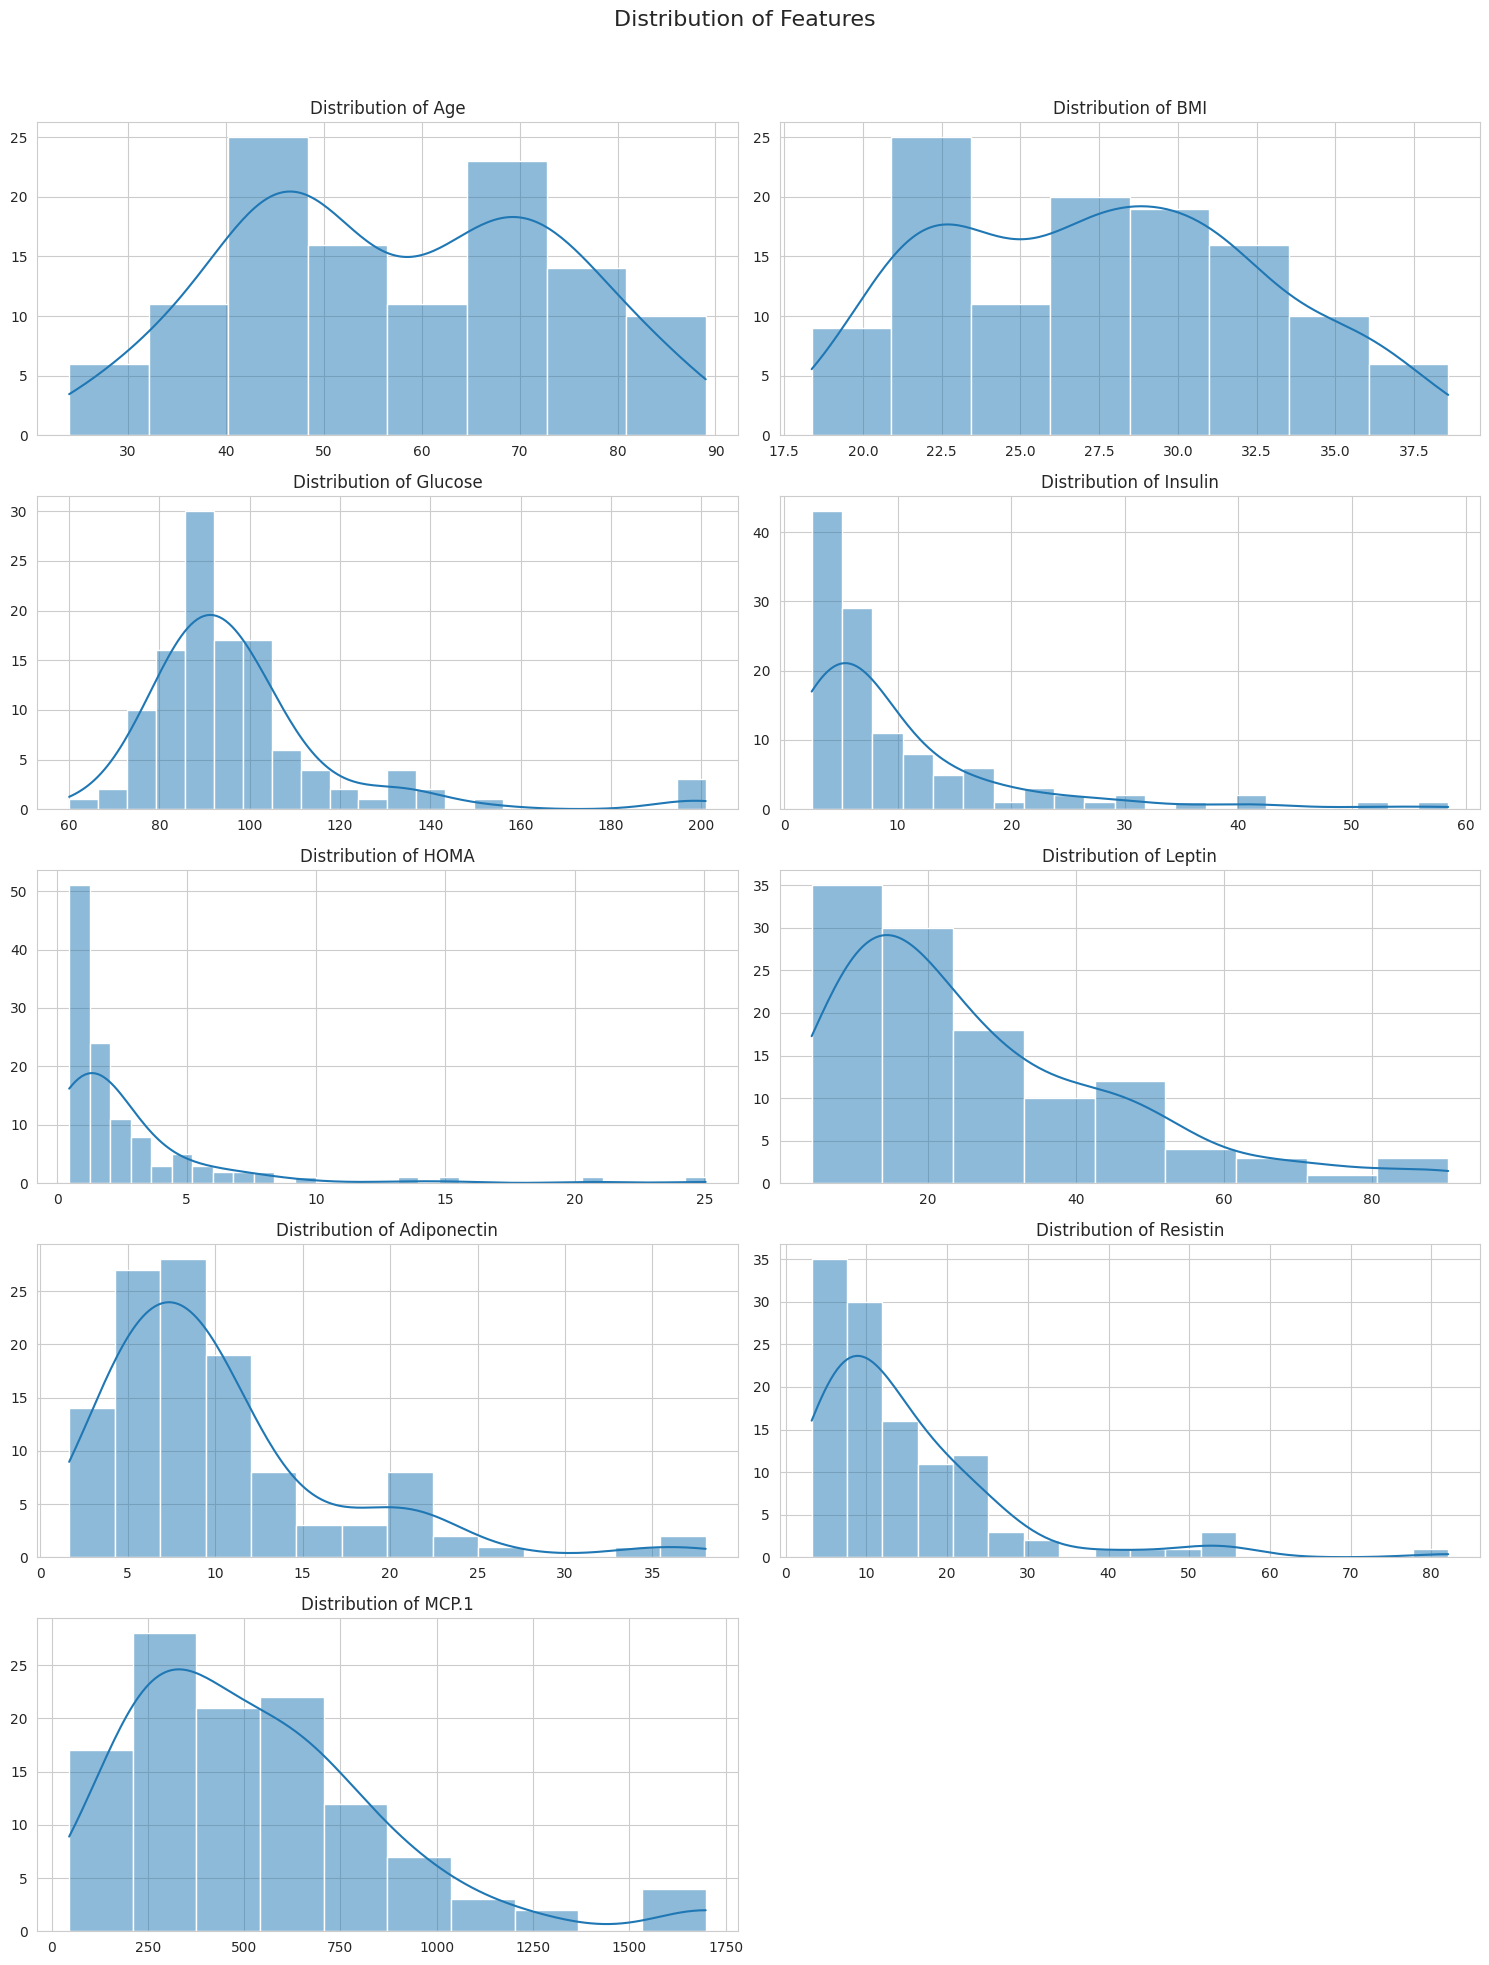

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of each feature
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Features', fontsize=16)

columns = data.columns[:-1]  # Excluding the target variable 'Classification'
for i, col in enumerate(columns):
    sns.histplot(data[col], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {col}')
    axes[i // 2, i % 2].set_xlabel('')
    axes[i // 2, i % 2].set_ylabel('')

# Remove any empty subplots
for j in range(len(columns), 10):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Correlation Analysis:
We will look at the correlation between features to identify potential multicollinearity and understand the relationship with the target variable.


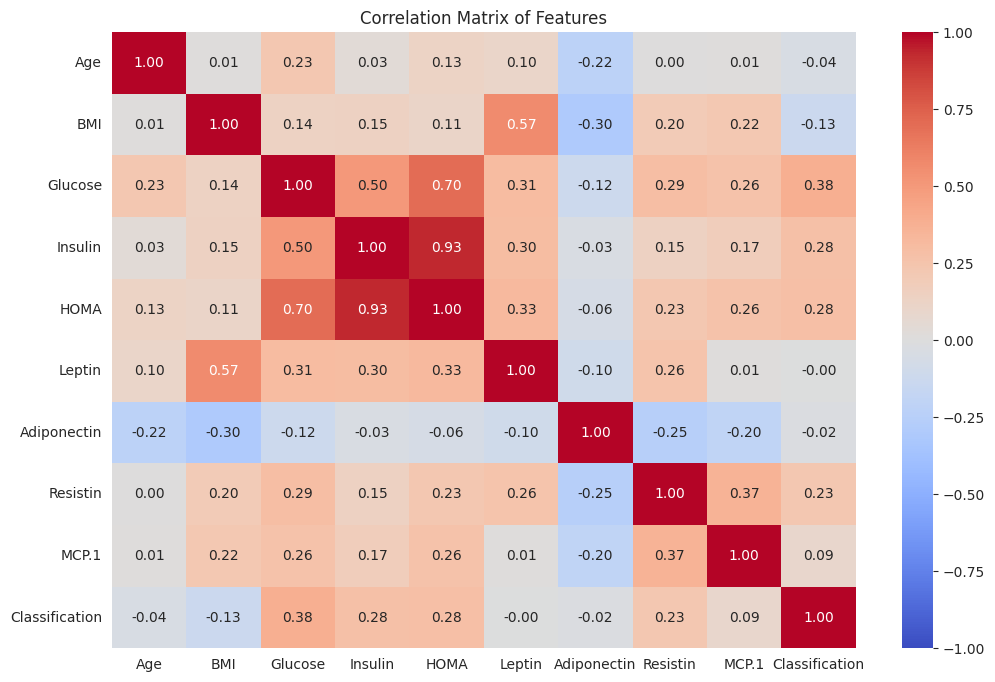

Classification    1.000000
Glucose           0.384315
HOMA              0.284012
Insulin           0.276804
Resistin          0.227310
MCP.1             0.091381
Leptin           -0.001078
Adiponectin      -0.019490
Age              -0.043555
BMI              -0.132586
Name: Classification, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Extract correlation with the target variable 'Classification'
target_corr = correlation_matrix['Classification'].sort_values(ascending=False)
print(target_corr)


### Key Observations:
**Classification Correlations:**

*   Glucose: Shows a moderate positive correlation with Classification (0.38), indicating that higher glucose levels may be associated with being classified as a patient (as opposed to a healthy control).

*   Insulin: Shows a moderate positive correlation with Classification (0.28), similar to glucose.

*   HOMA: Also shows a moderate positive correlation with Classification (0.28), likely due to its relationship with insulin and glucose.

*   BMI: Shows a slight negative correlation with Classification (-0.13), suggesting a minor inverse relationship.

*   Other features like Age, Leptin, Adiponectin, Resistin, and MCP.1 show weak correlations with Classification.


**Feature Correlations:**

*   Insulin and HOMA: These two features have a very high positive correlation (0.93), indicating strong multicollinearity. This makes sense as HOMA is derived from insulin levels.

*   Glucose and HOMA: These features also show a strong positive correlation (0.70), which is expected since HOMA involves glucose.

*   Leptin and BMI: Show a moderate positive correlation (0.57), indicating that higher BMI is associated with higher leptin levels.

*   Other Notable Correlations:

  *   Insulin and Glucose: Moderate positive correlation (0.50).
  *   Resistin and MCP.1: Moderate positive correlation (0.37).




## Visualize Data:
Use visualizations to depict relationships and distributions.

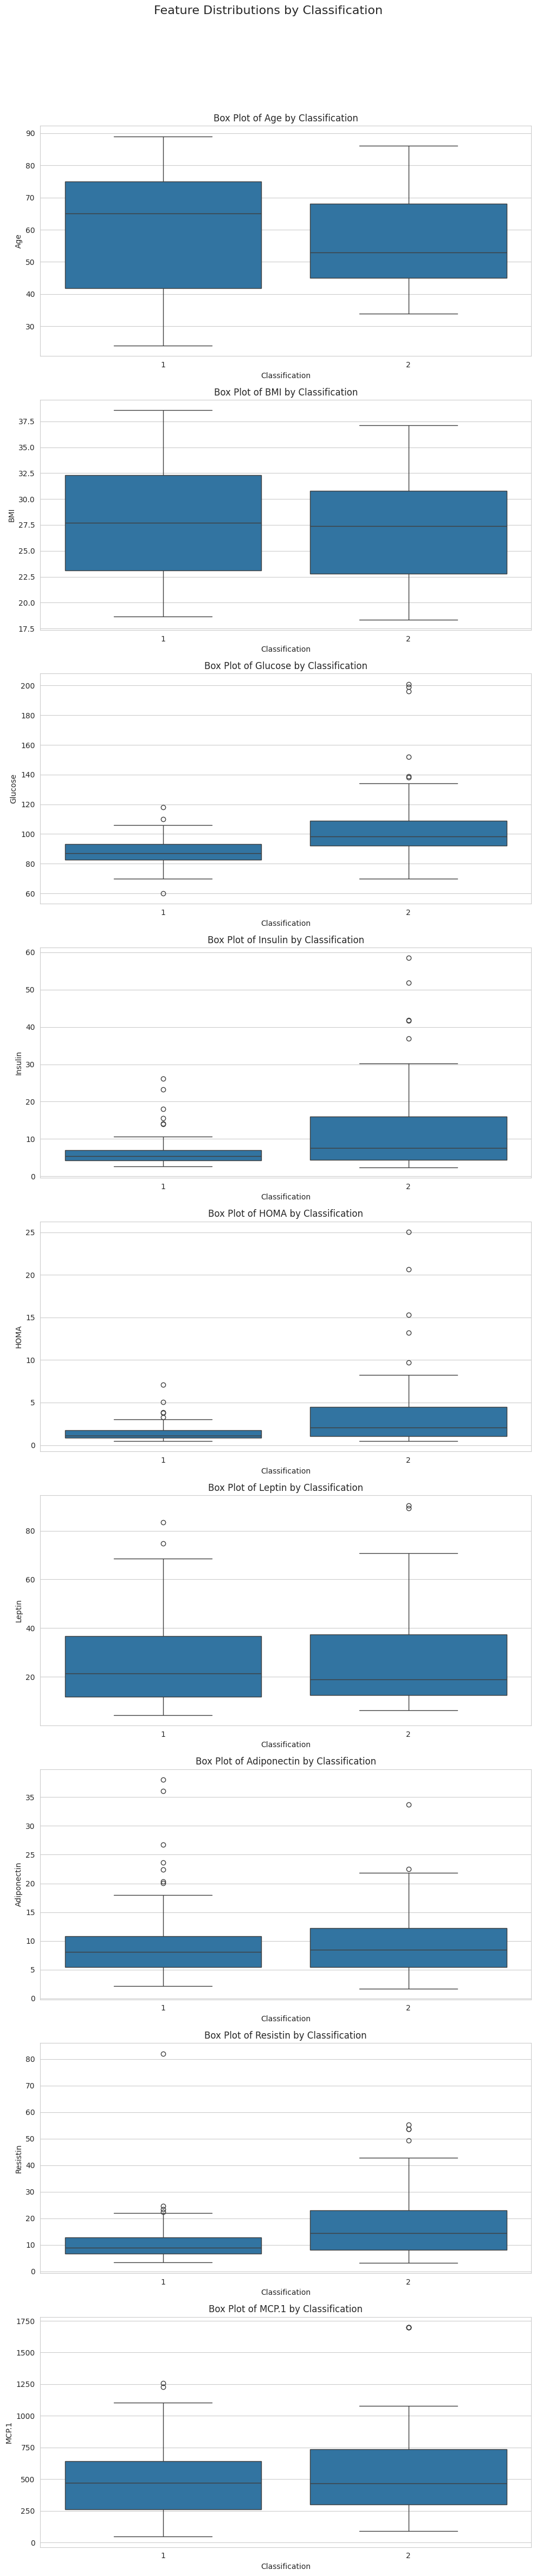

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and `columns` contains the list of column names
columns = data.columns

# Setting up the plotting area for box plots only
fig, axes = plt.subplots(nrows=len(columns)-1, ncols=1, figsize=(10, len(columns) * 5))
fig.suptitle('Feature Distributions by Classification', fontsize=16)
axes = axes.flatten()

# Plotting box plots
for i, column in enumerate(columns[:-1]):  # Exclude the target column itself
    sns.boxplot(data=data, x='Classification', y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} by Classification')
    axes[i].set_xlabel('Classification')
    axes[i].set_ylabel(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

